In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report, 
    precision_score, 
    recall_score, 
    f1_score, 
    confusion_matrix
)
from sklearn.tree import DecisionTreeClassifier
from datetime import datetime
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('always')

In [2]:
df = pd.read_csv('bank_transactions2.csv')
df.head()

,first_name,last_name,date_of_birth,sender_card_number,receiver_cc_number,transaction_amount,transaction_date,is_fraud
0,Jacob Salinas,Krista Nolan,2007-05-12,2475480622143887,2529677371753651,74556.99,2022-10-30 04:06:10,0
1,Lisa Castillo,Ronald Bryan,1959-10-12,2715910999405782,5242998865060315,12784.00,2022-05-20 23:46:49,0
2,Melanie Gomez,Elizabeth Brown,1914-07-11,5328978080501084,2536338331446248,36781.67,2022-05-23 05:34:45,0
3,Bradley Evans,Christopher Fisher,2007-10-13,2718649482370361,2276430890454293,86997.56,2022-07-17 19:29:10,0
4,Trevor Gonzalez,Michael Duncan,1913-04-22,2720731806955949,2513298401142431,64527.42,2022-01-08 09:23:23,0


### Exploratory Data Analysis

In [3]:
df.describe()

,sender_card_number,receiver_cc_number,transaction_amount,is_fraud
count,1.030500e+04,1.030500e+04,10305.000000,10305.000000
mean,3.140262e+15,3.150055e+15,50127.223444,0.009025
std,1.277803e+15,1.281568e+15,28808.642168,0.094574
min,2.221003e+15,2.221027e+15,1.020000,0.000000
25%,2.269151e+15,2.270615e+15,25275.290000,0.000000
50%,2.505224e+15,2.512923e+15,50164.520000,0.000000
75%,2.720955e+15,2.720991e+15,75119.680000,0.000000
max,5.599609e+15,5.599767e+15,99980.420000,1.000000


In [4]:
df.shape

(10305, 8)

In [5]:
df.dtypes

first_name             object
last_name              object
date_of_birth          object
sender_card_number      int64
receiver_cc_number      int64
transaction_amount    float64
transaction_date       object
is_fraud                int64
dtype: object

In [6]:
df.isnull().values.any()

False

In [7]:
df.transaction_amount.describe()

count    10305.000000
mean     50127.223444
std      28808.642168
min          1.020000
25%      25275.290000
50%      50164.520000
75%      75119.680000
max      99980.420000
Name: transaction_amount, dtype: float64

In [8]:
fraud = df[df['is_fraud'] == 1]
valid = df[df['is_fraud'] == 0]

fraud_percentage = (len(fraud)/(len(fraud)+len(valid))) * 100
outlier_fraction = len(fraud) / float(len(valid))

print(f'Outlier fraction: {outlier_fraction}')
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))
print(f"Percentage of fraud transactions: {fraud_percentage} %")


Outlier fraction: 0.009106933019976499
Fraud Cases: 93
Valid Cases: 10212
Percentage of fraud transactions: 0.9024745269286754 %


In [28]:
fraud.head(10)

,first_name,last_name,date_of_birth,sender_card_number,receiver_cc_number,transaction_amount,transaction_date,is_fraud
16,Robert Ware,Steven Taylor,1927-12-07,2720320488924173,2275860822332657,93979.86,2022-01-14 02:28:27,1
38,Robert Holmes,Lori White,1921-01-01,2720598931211682,2268601965768060,11818.70,2022-09-13 21:59:31,1
293,Amy Holmes,Rebekah Mcguire,1921-01-27,2225040394607437,2573604082505399,25965.50,2022-10-06 09:55:11,1
418,Mario Vasquez,Antonio Barrera,2014-12-04,2707663718129106,2248084477460531,63072.04,2022-04-19 18:40:51,1
425,Mrs. Alexandra Gentry,Troy Vargas,1929-02-19,2708555739541138,2713523714683823,47978.69,2022-06-23 22:06:01,1
806,Tiffany Cooper,Sarah Brown,1961-07-11,2720089715825061,2382919813759987,18737.14,2022-02-17 11:46:00,1
808,William Davis,Benjamin Graham,1917-08-28,2286921609167158,2718829750177462,14400.63,2022-08-11 05:24:43,1
857,Holly Pena,John Ryan,1934-09-20,2707719612763208,2374965022864001,49123.69,2022-02-19 14:53:26,1
1431,Jennifer Hill,Robert Benton,1918-08-23,2720606808141633,2224724273133604,91724.14,2022-04-12 02:30:25,1
1443,Alexander Walters,Olivia Taylor,1964-03-06,5346352801719631,2278119603512681,75316.50,2022-02-19 12:24:10,1


In [10]:
print("Amount details of the fraudulent transactions")
fraud.transaction_amount.describe()

Amount details of the fraudulent transactions


count       93.000000
mean     44015.216559
std      27859.072532
min       1043.880000
25%      19058.350000
50%      42390.740000
75%      63479.730000
max      99844.410000
Name: transaction_amount, dtype: float64

In [11]:
print("Amount details of the valid transactions")
valid.transaction_amount.describe()

Amount details of the valid transactions


count    10212.000000
mean     50182.885081
std      28812.508185
min          1.020000
25%      25307.405000
50%      50233.660000
75%      75169.282500
max      99980.420000
Name: transaction_amount, dtype: float64

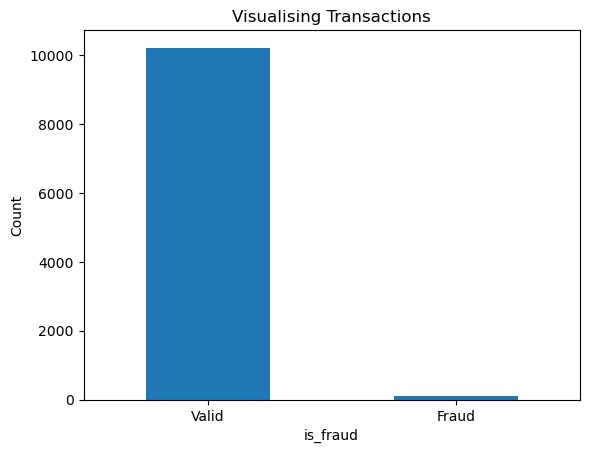

In [12]:
LABELS = ['Valid',"Fraud"]
classes = df.value_counts(df.is_fraud, sort=True)
classes.plot(kind='bar',rot=0)
plt.title("Visualising Transactions")
plt.ylabel("Count")
plt.xticks(range(2),LABELS)
plt.show()

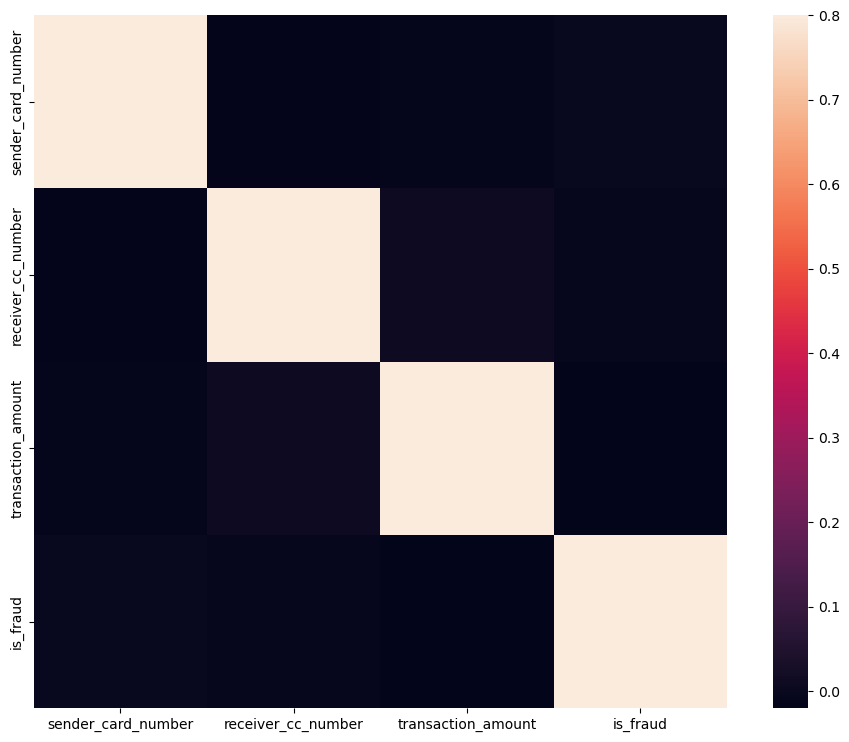

In [13]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)
# save in a png file
plt.savefig('correlation_matrix.png')
plt.show()

## Building a training model

In [14]:
# Divide the data into features and targets
x = df.drop(['first_name', 'last_name','date_of_birth','transaction_date' ,'is_fraud'], axis=1)
Y = df['is_fraud']

X = x.values
y = Y.values

# Get the shape of the data
print(X.shape)
print(y.shape)

(10305, 3)
(10305,)


In [15]:
# splitting the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

Shape of x_train: (1030, 3)
Shape of x_test: (9275, 3)


> The model

In [16]:
model = RandomForestClassifier(n_estimators=100)

In [17]:
# Train and evaluate the model
model.fit(x_train, y_train)
predictions = model.predict(x_test)

model_score = model.score(x_test, y_test) * 100

print(f'Score: {model_score}')

Score: 99.06199460916442


In [18]:
precision_score(y_test, predictions)

C:\Users\thuam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

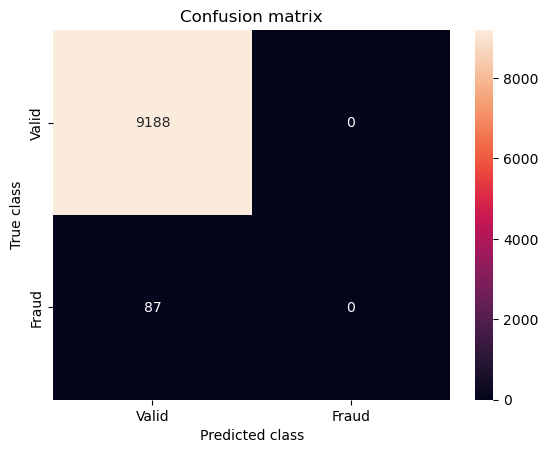

In [19]:

mattr = confusion_matrix(y_test, predictions)
sns.heatmap(mattr, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

### Addressing the imbalance

> If we observe our dataset suffers a serious problem of class imbalance. The genuine (not fraud) transactions are more than 99% with the credit card fraud transactions constituting 0.9%.

>>With such a distribution, if we train our model without taking care of the imbalance issues, it predicts the label with higher importance given to genuine transactions (as there is more data about them) and hence obtains more accuracy.

>>The class imbalance problem can be solved by various techniques. Oversampling is one of them.

>>Oversample the minority class is one of the approaches to address the imbalanced datasets. The easiest solution entails doubling examples in the minority class, even though these examples contribute no new data to the model.

>>Instead, new examples may be generated by replicating existing ones. The Synthetic Minority Oversampling Technique, or SMOTE for short, is a method of data augmentation for the minority class.

In [20]:
from collections import Counter
X_resampled, Y_resampled = SMOTE().fit_resample(X, y)
print("Resampled shape of X: ", X_resampled.shape)
print("Resampled shape of Y: ", Y_resampled.shape)

value_counts = Counter(Y_resampled)
print(value_counts)

(train_X, test_X, train_Y, test_Y) = train_test_split(X_resampled, Y_resampled, test_size= 0.5, random_state= 42)

Resampled shape of X:  (20424, 3)
Resampled shape of Y:  (20424,)
Counter({0: 10212, 1: 10212})


In [21]:
# Now we use the model to train our data
rf_resampled = RandomForestClassifier(n_estimators = 100)
rf_resampled.fit(train_X, train_Y)

predictions_resampled = rf_resampled.predict(test_X)
random_forest_score_resampled = rf_resampled.score(test_X, test_Y) * 100

print(f"Score: {random_forest_score_resampled}")

Score: 92.02898550724638


Confusion Matrix - Random Forest
[[4549  586]
 [ 228 4849]]


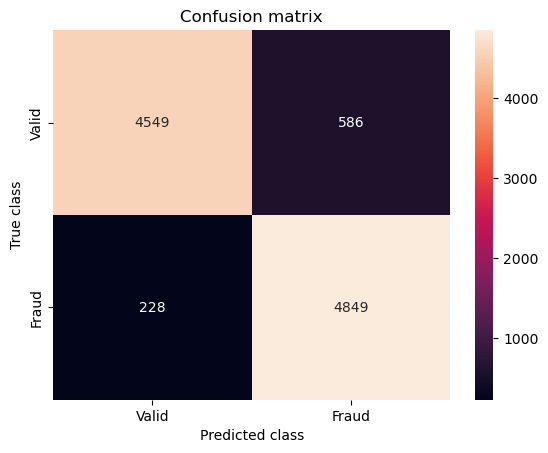

In [22]:
cm_resampled = confusion_matrix(test_Y, predictions_resampled.round())
print("Confusion Matrix - Random Forest")
print(cm_resampled)

mattr = confusion_matrix(test_Y, predictions_resampled)
sns.heatmap(mattr, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [23]:
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))

print("Evaluation of Random Forest Model")
print()

metrics(test_Y, predictions_resampled.round())

Evaluation of Random Forest Model

Accuracy: 0.92029
Precision: 0.89218
Recall: 0.95509
F1-score: 0.92256


### Serialising the model

In [24]:
pd.to_pickle(rf_resampled, r"C:\\Users\\thuam\\PycharmProjects\\Online_Banking_System\\ml_model\\fraud_detection_model.pickle")

### Deserialising the model

In [25]:
model = pd.read_pickle(r"C:\\Users\\thuam\\PycharmProjects\\Online_Banking_System\\ml_model\\fraud_detection_model.pickle")

In [27]:
sender = int(input("Enter the cc number of sender: "))
receiver = int(input("Enter the cc number of receiver: "))
amount = float(input("Enter the amount to transact: "))

result = model.predict([[sender,receiver,amount]])
print(result)

Enter the cc number of sender: 2720320488924173
Enter the cc number of receiver: 2275860822332657
Enter the amount to transact: 57456
[0]
